In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class supplier:
    def __init__(self,document_contracts,document_publishers):
        self.document_contracts = document_contracts
        self.document_publishers = document_publishers
        self.df = pd.read_csv(self.document_contracts,sep=';').dropna().reset_index(drop=True) #Vráti dataframe bez NaN, po odstránení chyb. dát sú usporiad. podľa indexov, bez medzier v indexovaní
        self.df2 = pd.read_csv(self.document_publishers,sep=';').dropna().reset_index(drop=True)
        self.supplier_names = self.df.SupplierName.drop_duplicates(keep='first').reset_index(drop=True).to_numpy() #Select všetkých dodávateľov
        self.supplier_ic = self.df.SupplierIC.drop_duplicates(keep="first").reset_index(drop=True) #Select všetkých dodávateľov podľa ic/id
        
    def get_dictionary(self):
        #vráti Dic z ID dodávateľov a mena
        supplier_table = dict(zip(self.supplier_ic,self.supplier_names))
        return supplier_table
  
    def record(self):
        #Metóda kt. vracia usporiadaný zoznam SupplierIC
        zoznam = []
        for i in range(0,len(self.supplier_ic)):
            zoznam.append(self.df.loc[self.df['SupplierIC'] == self.supplier_ic[i]].reset_index(drop=True))
        return zoznam
           
    def get_record(self,index):
        #Metóda kt. vracia záznam pre špecifického dodávateľa podľa jeho indexu. Index dod. je uvedený v get_dictionary
        record = self.record()
        return record[index]
        
    
    def calc_total_value(self,idx):
        #Metóda kt. robí celkový výpočet zaplatených daní u konkrétneho dodávateľa podľa jeho indexu. Túto sumu neskôr porovnávam
        #a na základe tejto value robím porovnávku hráčov na trhu (viac zákazok (väčší objem) == viac penazí na daniach)
        zoznam = self.record()
        total_value = 0.0
        for index in range(0,len(self.supplier_ic)):
            zoznam[index].ValueVatIncluded = zoznam[index]["ValueVatIncluded"].astype(float)
        for i in range(0,zoznam[idx].ValueVatIncluded.shape[0]):
            total_value = total_value + zoznam[idx].ValueVatIncluded[i]
            if i == zoznam[idx].ValueVatIncluded.shape[0]-1:
                return total_value
    
    def compare(self):
        #list kt. slúži na uchovávanie celk. sumy s DPH pre všetkých dodávateľov, usp. podľa indexov.
        list_VatIncluded = []
        for index in range(0,len(self.supplier_ic)):
            list_VatIncluded.append(self.calc_total_value(0+index))
        #Sort algoritmus na usporiadanie podľa objemu "penazí" s DPH usporiadaný od najväčšieho > najmenšieho dodávateľa
        #v procese sa dict. d mení na list s ktorým sa neskôr lepšie pracuje
        d = {}
        for i in range(0,len(self.supplier_ic)):
            d.setdefault(self.supplier_ic[i], [list_VatIncluded[i],self.supplier_names[i]])
        d = sorted(d.items(), key=lambda x:x[1], reverse=True)
        #vytvorenie premenných ktoré. slúžia na vykreslovanie grafu (x,y) values
        graph_id = []
        graph_value = []
        graph_id_name = []
        split_array = []
        d = list(d)
        #append hodnôt grafu hodnotami podľa indexov spoločnosťí
        for i in range(0,len(dataset1.supplier_ic)):
            graph_id.append(d[i][0])
            split_array.append(d[i][1])
        if i == len(dataset1.supplier_ic)-1:
            for i in range(0,len(dataset1.supplier_ic)):
                graph_value.append(split_array[i][0])
                graph_id_name.append(split_array[i][1])
        y_pos = np.arange(len(graph_id))
        plt.bar(y_pos, graph_value, color=[0.2, 0.4, 0.6, 0.6])
        plt.xticks(y_pos, graph_id_name, rotation=90)
        plt.subplots_adjust(bottom=0.2)
        plt.ylabel('Hodnoty')
        plt.title("Zobrazenie dodávateľov stravných lístkov v ČR\n Od dodávateľov, ktorí maju najväčší vplyv na trh > po dodávateľov kt. majú najmenší")
        plt.subplots_adjust(top=2,right=3)
        plt.show()
        
        

In [4]:
dataset1 = supplier("contracts.csv","publishers.csv")

In [5]:
# Metóda triedy, ktorá vracia usporiadaný zoznam (knižnicu) s ID dodávateľa a jeho meno
dataset1.get_dictionary()

{176150.0: 'Konica Minolta Business Solutions Czech, spol. s r.o.',
 47676795.0: 'AutoCont CZ a.s.',
 24745391.0: 'Edenred CZ s.r.o.',
 64949681.0: 'T-Mobile Czech Republic a.s.',
 62913671.0: 'Up Česká republika s.r.o.',
 25788001.0: 'Vodafone Czech Republic a.s.',
 60193336.0: 'O2 Czech Republic a.s.',
 47903783.0: 'GORDIC spol. s r.o.',
 61860476.0: 'Sodexo Pass Česká republika a.s.',
 25892533.0: 'TESCO SW a.s.',
 45786259.0: 'NESS Czech s.r.o.',
 14890992.0: 'IBM Česká republika, spol. s r.o.'}

In [6]:
# Metóda triedy, ktorá vráti (zobrazí) špecifický záznam pre danú spoločnosť podľa jej indexu 
dataset1.get_record(1) 

,ContractId,VersionId,Subject,PublishedAtUtc,ValueVatExcluded,ValueVatIncluded,SupplierIC,SupplierName,PublisherIC
0,4310492,4644904,Změny v aplikaci rozhraní ISDS,2018-02-08 18:50:28,26000.0,31460,47676795.0,AutoCont CZ a.s.,72054506.0
1,1653506,1784646,Rozšíření virtuální farmy v Nemocnici Havlíčků...,2017-04-25 09:50:04,425200.0,514792,47676795.0,AutoCont CZ a.s.,179540.0
2,1630666,1759310,Tablety - 7ks,2017-04-21 10:16:15,78776.0,95319,47676795.0,AutoCont CZ a.s.,71001565.0
3,3256086,3511914,zpracování bezpečnostní analýzy,2017-10-23 08:58:17,195000.0,235950,47676795.0,AutoCont CZ a.s.,257265.0
4,2888478,3110114,Kupní smlouva - Fortinet - prodloužení podpory,2017-09-11 11:36:54,79600.0,96316,47676795.0,AutoCont CZ a.s.,268810.0
...,...,...,...,...,...,...,...,...,...
1367,3252710,3508390,2x 50 licencí VPN + servis,2017-10-20 17:26:25,107074.0,107074,47676795.0,AutoCont CZ a.s.,48136069.0
1368,3776512,4072904,Dodávka notebooků,2017-12-12 23:00:47,88775.0,88775,47676795.0,AutoCont CZ a.s.,216305.0
1369,3155890,3401798,AutoCont CZ - Prodloužení podpory pro zálohova...,2017-10-11 12:19:31,34604.0,41872,47676795.0,AutoCont CZ a.s.,284891.0
1370,4171528,4494660,"Samsung Galaxy Tab. S3 9,7 LTE, Samsung Galax...",2018-01-25 12:25:13,96840.0,117176,47676795.0,AutoCont CZ a.s.,90450.0


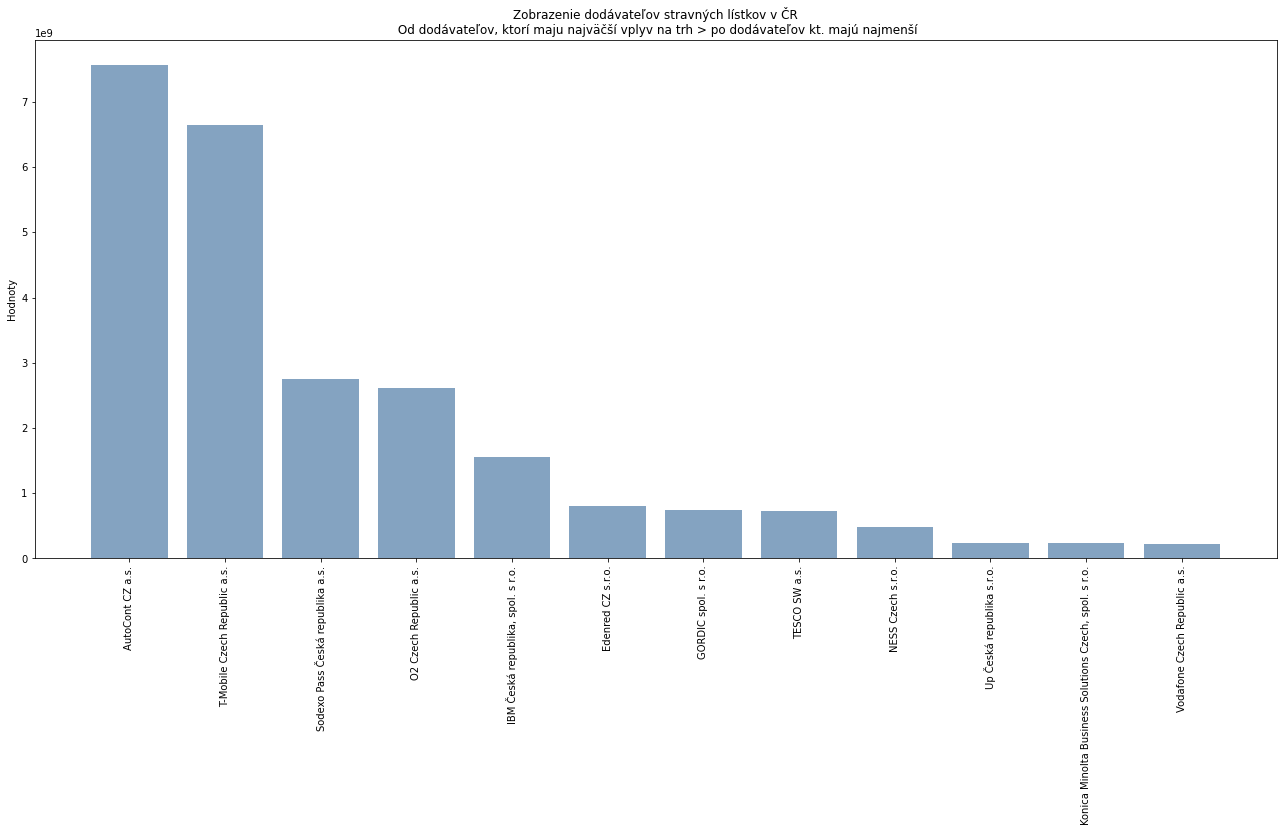

In [7]:
#Zobrazenie - Porovnanie dodávateľov stravných lístkov pre český trh od najvačšieho > najmenšieho 
dataset1.compare()

In [8]:
#Výpočet celkovej sumy s daňou pre konkrétneho dodávateľa podľa jeho indexu v dict (SupplierIC)
dataset1.calc_total_value(0)

229530647.0

In [9]:
#Výpis celk. záznamu ktorý je obsiahnutý v csv "contracts.csv"
dataset1.df.head(30)

,ContractId,VersionId,Subject,PublishedAtUtc,ValueVatExcluded,ValueVatIncluded,SupplierIC,SupplierName,PublisherIC
0,4813488,5194176,Dílčí objednávka: chodbová tiskárna,2018-04-09 14:17:57,85187.0,103076,176150.0,"Konica Minolta Business Solutions Czech, spol....",70844844.0
1,4716748,5086948,Nájem kopírovacího stroje bizhub C258,2018-03-27 14:50:19,104160.0,126033,176150.0,"Konica Minolta Business Solutions Czech, spol....",854379.0
2,2936826,3162690,Pronájem kopírek,2017-09-15 12:34:43,314272.0,380269,176150.0,"Konica Minolta Business Solutions Czech, spol....",18385036.0
3,5450615,5868323,Implementace aplikačního prostředí programovéh...,2018-06-14 14:23:08,96000.0,116160,176150.0,"Konica Minolta Business Solutions Czech, spol....",25848526.0
4,5688523,6127199,Pronájem kopírovacího stroje pro SVK HK_kopírka 4,2018-07-12 12:48:39,52991.0,64120,176150.0,"Konica Minolta Business Solutions Czech, spol....",412821.0
5,5882271,6338311,servisní smlouvy - Smlouva o nájmu a poskytová...,2018-08-06 11:11:00,154080.0,186436,176150.0,"Konica Minolta Business Solutions Czech, spol....",274968.0
6,373201,397545,Dodávka 5 ks Kodak i2420,2016-10-14 12:11:42,81026.0,98040,176150.0,"Konica Minolta Business Solutions Czech, spol....",64581.0
7,5286127,5691871,Objednávka - 2 ks tiskáren (rámcová smlouva),2018-05-30 06:56:06,260648.0,260648,176150.0,"Konica Minolta Business Solutions Czech, spol....",25224.0
8,656665,697233,Ostatní smlouvy - Servisní a materiálová smlou...,2016-11-28 13:52:51,1675.0,2027,176150.0,"Konica Minolta Business Solutions Czech, spol....",298212.0
9,5688659,6127363,Pronájem kopírovacího stroje pro SVK HK_kopírka 5,2018-07-12 12:52:51,52991.0,64120,176150.0,"Konica Minolta Business Solutions Czech, spol....",412821.0


In [10]:
# Questions sú riešené v ďalších jupyter lab súboroch (Question.ipynb). Sú riešené prakticky aj teoreticky